## **<center><font style="color:rgb(191,170,0)">Karatsuba Algorithm for Large Integer Multiplication</font> </center>**

<font style="color:rgb(0,0,0)">The Karatsuba algorithm is a fast multiplication algorithm that was developed by Anatoly Karatsuba in the 1960s. 

It is a **'divide and conquer'** algorithm that reduces the multiplication of two n-digit numbers to three multiplications of n/2-digit numbers. 

Divide each number into two halves, and then apply some given steps.

The Karatsuba algorithm has a time complexity of **`O(n^log_2 3)`**, which is faster than the traditional multiplication algorithm, which has a time complexity of **```O(n^2)```**. 

This makes it more efficient for large numbers and has made it a popular choice for implementing multiplication in computer software. 

It is also used as a building block for more efficient multiplication algorithms, such as the **```Toom-Cook```** algorithm and the **```Schönhage-Strassen```** algorithm. </font>

### **<font style="color:rgb(191,170,0)">1. Why we need karatsuba Algorithm?</font>**

<font style="color:rgb(0,0,0)">1. The conventional method used to multiply two numbers are not efficient in terms of time complexity for large numbers. </font>

#### **<font style="color:rgb(191,170,0)">How?</font>**

<font style="color:rgb(0,0,0)">

2. Suppose that we have two n-digit numbers x and y as shown below, and we want to calculate the product of x and y.

3. In traditional multiplication method which is also known as Naive algorithm, we need to multiply one digit of "y" with all digits of "x" in each row.

4. Each digit multiplication is a single operation, so if "x" is n-digit number, then it means we are performing n-operations in each row.

5. So total number of operations for "n" rows would be n*n = n^2.

6. The total time required to multiply two n-digit numbers is O(n^2)</font>

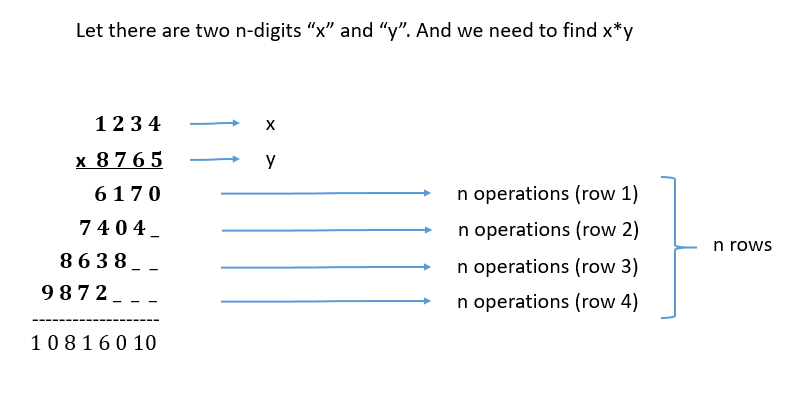


### **<font style="color:rgb(191,170,0)">2. Implementing Naive Algorithm</font>**

In [7]:
def naive_multiplication(a, b):
    result = 0
    for i in range(1, b+1):
        result += a
    return result

# test the function
print(naive_multiplication(321, 545))  # should print 12
print(naive_multiplication(5, 5))  # should print 25
print(naive_multiplication(2, 7))  # should print 14


174945
25
14


In [1]:
def multiplication(X, Y):
    # convert numbers into string
    x = str(X)
    y = str(Y)
    result = 0
    # looping over y
    for i in range(len(y)):
        carry = 0  # Intermediate carry
        inter_res = ""  # Intermediate result
        # looping over x
        for j in range(len(x) - 1, -1, -1):
            # intermediate multiplication of each digit and addition of carry
            num = int(y[i]) * int(x[j]) + carry
            # if intermediate multiplication is of two digits and j>0
            #   then second digit is appended to intermediate result
            #   and first digit is stored as carry
            if num > 9 and j > 0:
                inter_res = str(num % 10) + inter_res
                carry = num // 10
            # else the digit is append to intermediate result
            # And assign carry as zero
            else:
                inter_res = str(num) + inter_res
                carry = 0
        # Adding the intermediate results
        result *= 10
        result += int(inter_res)
    return result

### **<font style="color:rgb(191,170,0)">3. Time Complexity of Naive Algorithm</font>**

<font style="color:rgb(0,0,0)">

Note that this is not the most efficient way to multiply two numbers, as it has a time complexity of O(n), where n is the value of y.

However, the function also uses the addition operation, which has a time complexity of O(n). Since the function is using both a loop and the addition operation, the overall time complexity is O(n^2).

In [4]:
from datetime import datetime

currentTime = datetime.now()
TimeInMicroSecBefore = currentTime.microsecond
print(TimeInMicroSecBefore)

multiplication(1231212, 2121221)

endTime = datetime.now()
TimeInMicroSecAfter = endTime.microsecond
print(TimeInMicroSecAfter)

totalTime = TimeInMicroSecAfter - TimeInMicroSecBefore

print(totalTime)

500769
503008
2239


In [8]:
import time

start = time.time()
result = naive_multiplication(10000032300000,100323000)
end = time.time()

print(f"Multiplication Result: {result}")
print('Time taken for ' +  str((end - start))
 + ' seconds')


Multiplication Result: 1003233240432900000000
Time taken for 8.632903575897217 seconds


In [10]:
import time

start = time.time()
result = naive_multiplication(89898989898,187878780999880)
end = time.time()

print(f"Multiplication Result: {result}")
print('Time taken for ' +  str((end - start))
 + ' seconds')

KeyboardInterrupt: 

### **<font style="color:rgb(191,170,0)">4. Steps of Karatsuba Algorithm for Large Integer Multiplication</font>**

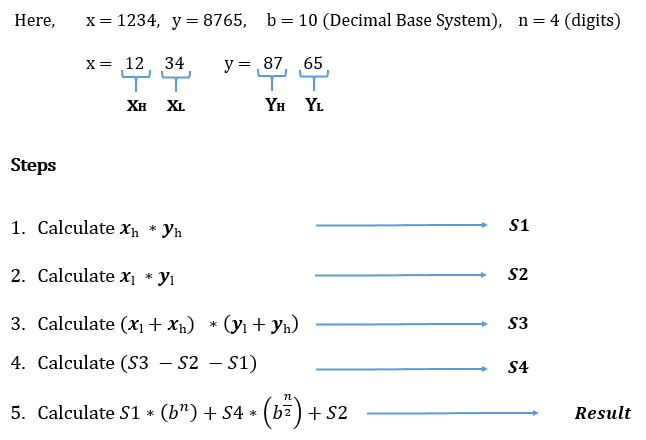
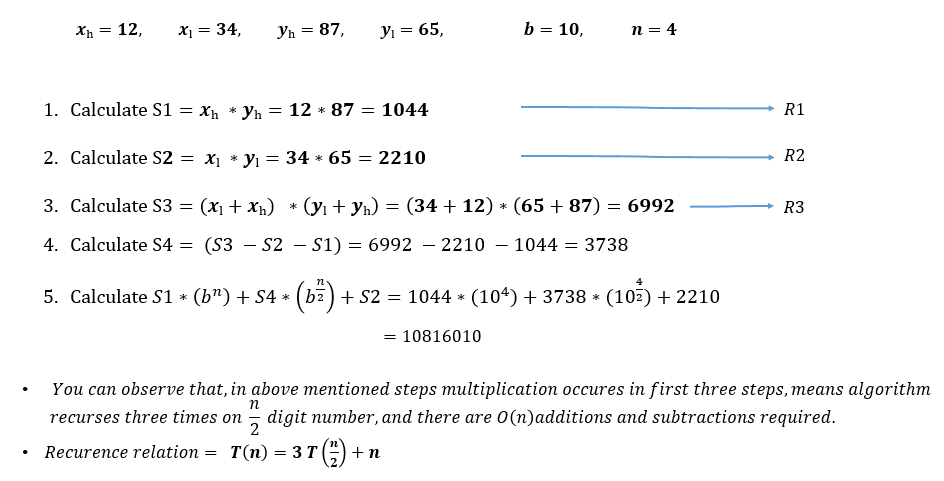

### **<font style="color:rgb(191,170,0)">5. Pseudo Code of Karatsuba Algorithm for Large Integer Multiplication</font>**

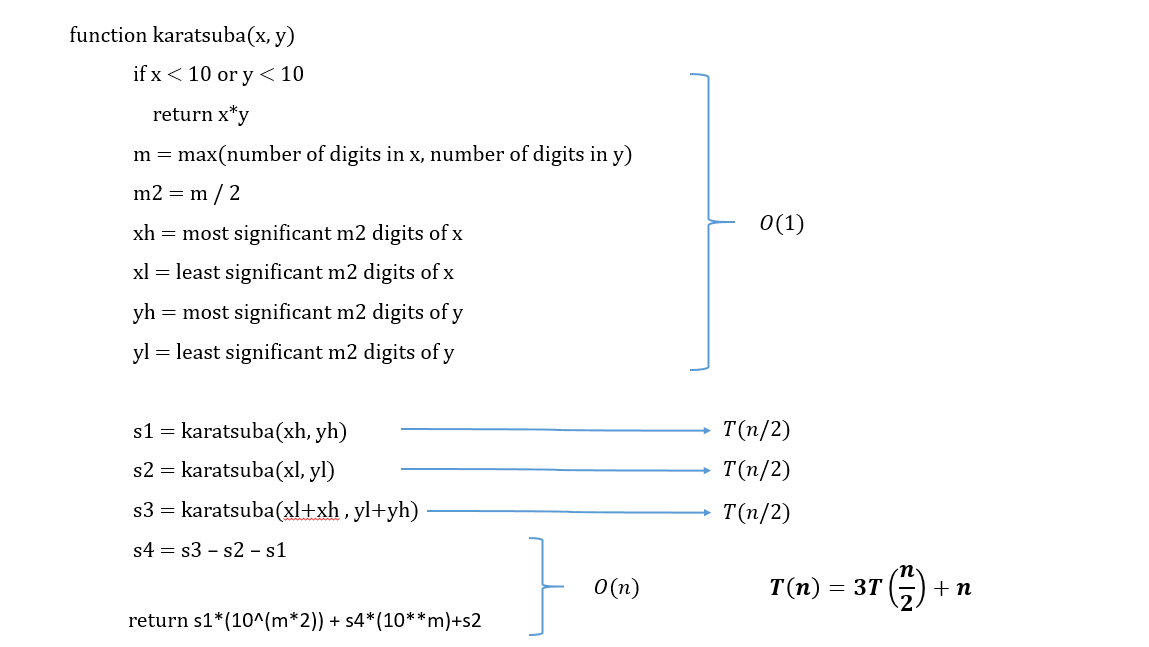

### **<font style="color:rgb(191,170,0)">6. Finding Time Complexity of Karatsuba Algorithm</font>**

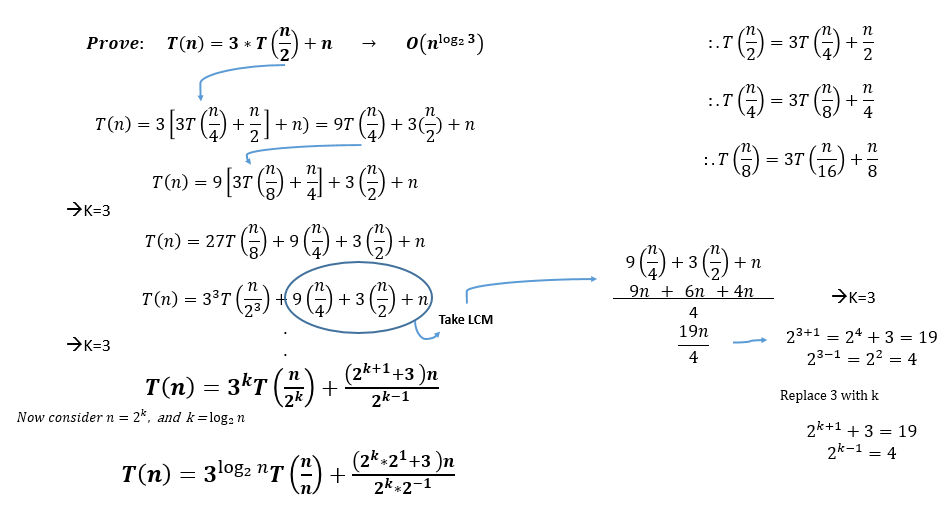
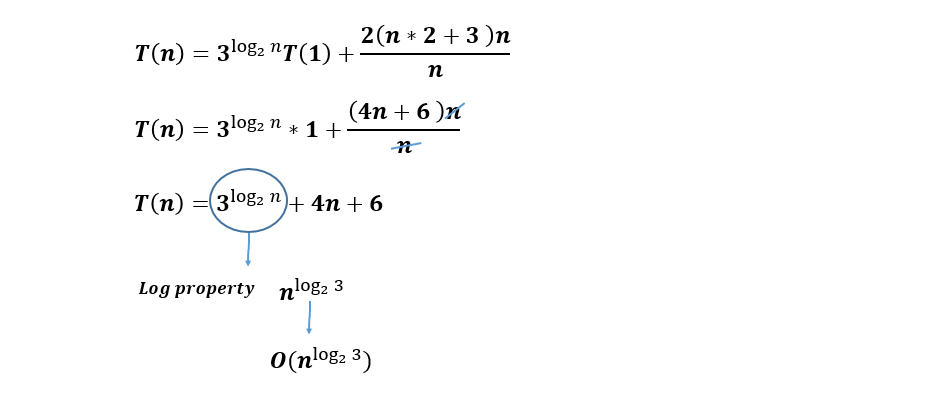

### **<font style="color:rgb(191,170,0)">7. Implementing Karatsuba Algorithm</font>**

In [5]:
import math             # this library gives us ceil() and floor() function

def karatsubaAlgorithm(x, y):
    
    if x < 10 and y < 10:       # this is base case (when x and y remains single digit number)
        return x*y 
    
    n = max(len(str(x)), len(str(y)))   # finding maximum number of digit in both number
    m = int(math.ceil(float(n)/2))      # number of digit for dividing numbers

    xh = int(math.floor(x / 10**m))     # dividing x into first half
    xl = int(x % (10**m))               # dividing x into second half

    yh = int(math.floor(y / 10**m))     # dividing y into first half
    yl = int(y % (10**m))               # dividing y into second half

    s1 = karatsubaAlgorithm(xh, yh)               # first recurrence (Step 1)
    s2 = karatsubaAlgorithm(xl, yl)               # second recurrence (Step 2)
    s3 = karatsubaAlgorithm(xh + xl, yh + yl)     # third recurrence (Step 3)

    s4 = s3 - s2 - s1                   # calculating s4 (Step 4)

    return int(s1*(10**(m*2)) + s4*(10**m)+s2)

### **<font style="color:rgb(191,170,0)">8. Dry run with example</font>**

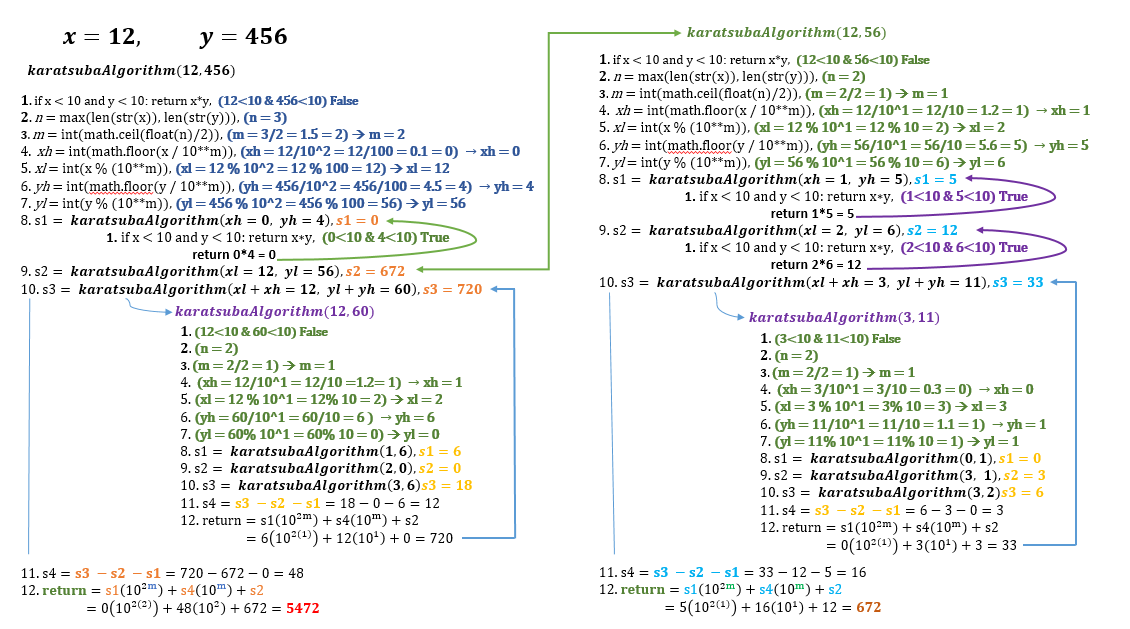

### **<font style="color:rgb(191,170,0)">9. Calculating Execution Time of Karatsuba Algorithm</font>**

In [12]:
import time

start = time.time()
result = karatsubaAlgorithm(89898989898,187878780999880)
end = time.time()

print(f"Multiplication Result: {result}")
print('Time taken for ' +  str((end - start))
 + ' seconds')

Multiplication Result: 16890112635156766459212240
Time taken for 0.00775146484375 seconds


In [13]:
from datetime import datetime

currentTime = datetime.now()
TimeInMicroSecBefore = currentTime.microsecond
print(TimeInMicroSecBefore)

karatsubaAlgorithm(1231212, 2121221)

endTime = datetime.now()
TimeInMicroSecAfter = endTime.microsecond
print(TimeInMicroSecAfter)

totalTime = TimeInMicroSecAfter - TimeInMicroSecBefore

print(totalTime)

903892
908069
4177


### **<font style="color:rgb(191,170,0)">9. Comparison of Naive and Karatsuba Algo. w.r.t. execution time</font>**